# EDA and Metadata Analysis

### 1. Checking Image Sizes

In [21]:
import cv2
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [22]:
folder_path = Path("../Biomass_data/train")
images = []

for file_path in folder_path.glob('*'):
    img = cv2.imread(str(file_path)) 

    if img is not None:
        images.append(img)
    
print(f"Loaded {len(images)} images.")

Loaded 355 images.


In [23]:
directory = Path('../Biomass_data/train')
image_paths = list(directory.glob('*'))

In [ ]:
images = np.array(images)
shape = images.shape
print(shape)

(355, 1000, 2000, 3)


Every image has the same size (1000 x 2000).

### 2. Checking lighting condition 

In [ ]:
array_brightness = []

def check_brightness(images): 
    for i, img in enumerate(images):
        
        image_path = str(image_paths[i])
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(hsv)
        avg_brightness = np.mean(v)
        array_brightness.append([image_path ,avg_brightness])
    
check_brightness(images)


In [26]:
y = []
for i in array_brightness: 
    y.append(i[1])

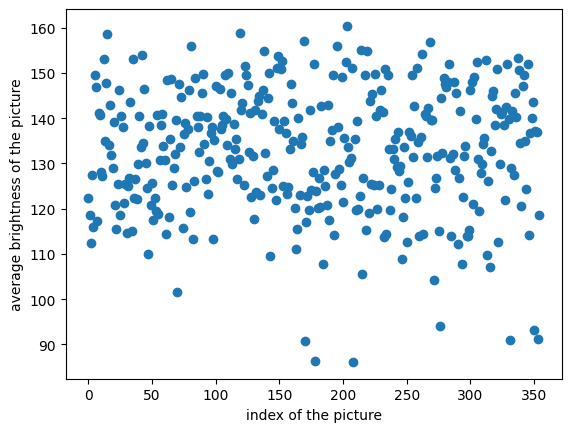

In [27]:
x = range(0,len(y))

plt.scatter(x , y)
plt.xlabel("index of the picture")
plt.ylabel("average brightness of the picture")
plt.show()

There are some pictures that are too dim and look like outliers, so I decided to remove those with an average brightness less than 100.

In [33]:
for path,brightness in array_brightness :
    if brightness < 95 :
        print( f"{path} : {brightness}" )
        #image = cv2.imread(path)
        # cv2.imshow(path ,image)
        Path(path).unlink(missing_ok=True)
        array_brightness.remove([path ,brightness])
# cv2.waitKey(0)
# cv2.desktroyAllWindows()

..\Biomass_data\train\ID194823383.jpg : 90.6743385
..\Biomass_data\train\ID1963715583.jpg : 86.2899055
..\Biomass_data\train\ID212206250.jpg : 86.1442205
..\Biomass_data\train\ID610397481.jpg : 94.116218
..\Biomass_data\train\ID866684633.jpg : 90.883097
..\Biomass_data\train\ID975115267.jpg : 93.2535955
..\Biomass_data\train\ID980878870.jpg : 91.1165


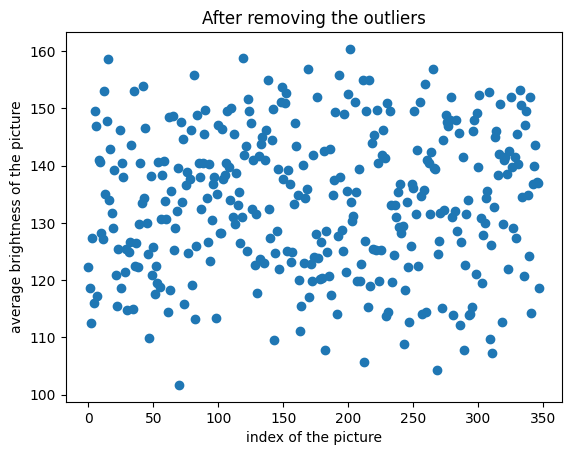

In [34]:
y = []
for i in array_brightness: 
    y.append(i[1])

x = range(0,len(array_brightness))

plt.scatter(x , y )
plt.title("After removing the outliers")
plt.xlabel("index of the picture")
plt.ylabel("average brightness of the picture")
plt.show()